In [3]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')

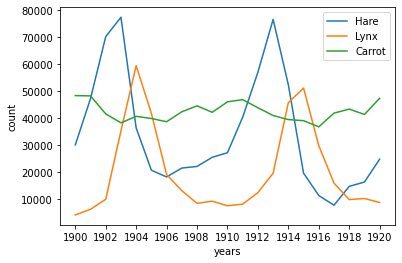

In [4]:
#Plot the populations for the years in the period. Add legend and axis labels to the plot.
years = data[:, 0]
plt.plot(years, data[:, 1], label= "Hare")
plt.plot(years, data[:, 2], label= "Lynx")
plt.plot(years, data[:, 3], label= "Carrot")
plt.legend()
plt.xticks(years[years % 2 == 0])
plt.xlabel('years')
plt.ylabel('count')
plt.show()

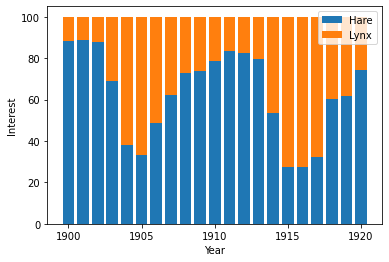

In [5]:
#Assuming total population of hares and lynxes is 100%, 
#plot stacked bar graph showing ratio of each specis for the years in the period.

total = (data[:,1]+data[:,2])/100
plt.bar(years, data[:, 1]/total, label='Hare')
plt.bar(years, data[:, 2]/total, label='Lynx',bottom=data[:,1]/total)
plt.legend()
plt.xticks(years.astype(int)[::5])
plt.xlabel('Year')
plt.ylabel('Interest')
plt.show()


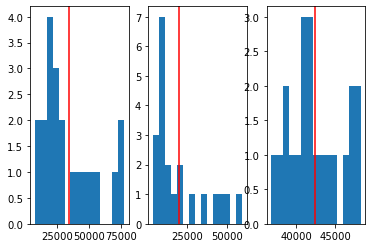

Hare std:  21842.706100051855
Lynx std:  14677.61427459009
Carrot std:  20380.862767381983


In [6]:
#Find the mean and std of the populations of each species. 
#Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.
fig, ax = plt.subplots(1,3)
ax[0].hist(data[:,1], bins = 15)
ax[0].axvline(data[:,1].mean(), c = 'r')

ax[1].hist(data[:,2], bins = 15)
ax[1].axvline(data[:,2].mean(), c = 'r')

ax[2].hist(data[:,3], bins = 15)
ax[2].axvline(data[:,3].mean(), c = 'r')
plt.show()
print("Hare std: ", np.std(data[:,[0,1]]))
print("Lynx std: ", np.std(data[:,[0,2]]))
print("Carrot std: ", np.std(data[:,[0,3]]))

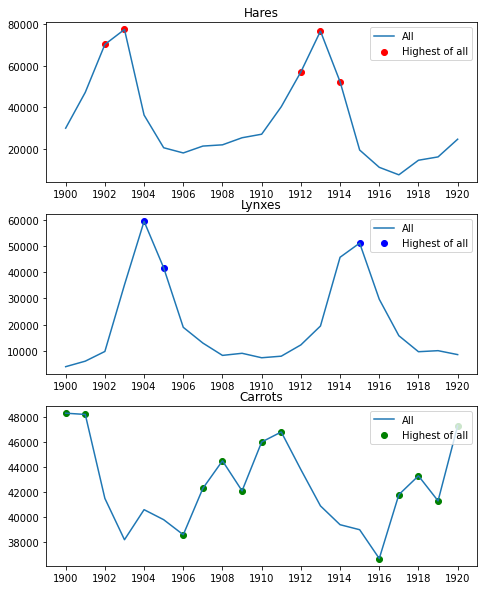

In [2]:
#Find which year each species had the largest population. Mark these years in the plot of populations.
a = np.array([(np.argmax(data[i, 1:]), i) for i in range(len(data[:,0]))])
a = np.transpose(a)
a0 = a[1][a[0] == 0]
a1 = a[1][a[0] == 1]
a2= a[1][a[0] == 2]

plt.figure(figsize=(17,10))
plt.subplot(3, 2, 1)
plt.plot(data[:,0], data[:,1])
plt.scatter(data[a0,0], data[a0,1], c='r')
plt.title('Hares')
plt.xticks(data[:,0].astype(int)[::2])
plt.legend(('All', 'Highest of all'), loc='upper right')
plt.subplot(3,2, 3)
plt.plot(data[:,0], data[:,2])
plt.scatter(data[a1,0], data[a1,2], c='b')
plt.title('Lynxes')
plt.xticks(data[:,0].astype(int)[::2])
plt.legend(('All', 'Highest of all'), loc='upper right')
plt.subplot(3,2,5)
plt.plot(data[:,0], data[:,3])
plt.scatter(data[a2,0], data[a2,3], c='g')
plt.title('Carrots')
plt.xticks(data[:,0].astype(int)[::2])
plt.legend(('All', 'Highest of all'), loc='upper right')
plt.show()

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


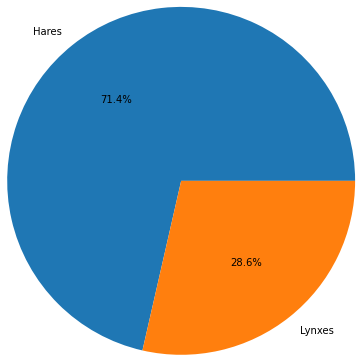

In [3]:
#Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.
a = np.array([(np.argmax(data[i, 1:3]), i) for i in range(len(data[:,0]))])
a = np.transpose(a)
x = a[0] == 0
x1 = np.array([int(x[i]) * "H"+ (1 -int(x[i])) * "L" for i in range(len(x))])
a1 = [len(x1[x1 == 'H']) / len(a[0]), (len(x1[x1=='L']) )/len(a[0])] 
print(x1)
plt.pie(a1, labels = ['Hares', 'Lynxes'], autopct='%1.1f%%', radius = 2 )
plt.show()

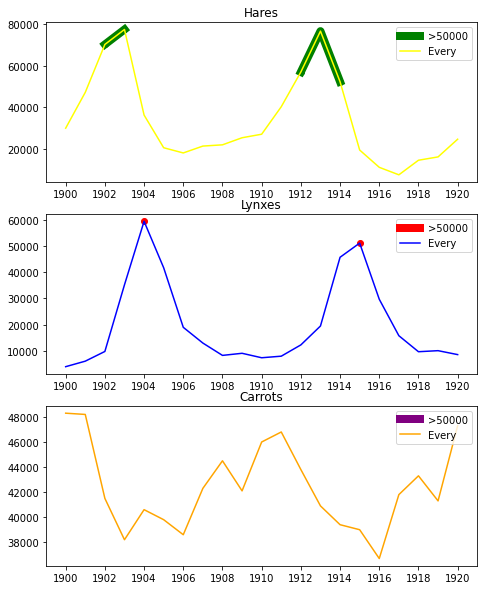

In [4]:
#Find which years any of the populations is above 50000. 
#Show time periods where populations are above 50000 in the plot of populations.
x = data[:,0]
y1 = np.ma.masked_where(data[:,1] < 50000, data[:,1])
y2 = data[:, 1]
z1 = np.ma.masked_where(data[:,2] < 50000, data[:,2])
z2 = data[:, 2]
w1 = np.ma.masked_where(data[:,3] < 50000, data[:,3])
w2 = data[:, 3]

plt.figure(figsize=(17,10))
plt.subplot(3, 2, 1)
lines = plt.plot(x, y1, x, y2)
plt.setp(lines[1], c='yellow')
plt.setp(lines[0], linewidth=8, c='g')
plt.scatter(x, y1, c='g')
plt.legend(('>50000', 'Every'), loc ='upper right')
plt.title('Hares')
plt.xticks(data[:,0].astype(int)[::2])
plt.subplot(3, 2, 3)
lines = plt.plot(x, z1, x, z2)
plt.setp(lines[1], c='blue')
plt.setp(lines[0], linewidth=8, c='r')
plt.scatter(x, z1, c='r')
plt.legend(('>50000', 'Every'), loc ='upper right')
plt.title('Lynxes')
plt.xticks(data[:,0].astype(int)[::2])
plt.subplot(3, 2, 5)
lines = plt.plot(x, w1, x, w2)
plt.setp(lines[0], linewidth=8, c='purple')
plt.setp(lines[1], c='orange')
plt.scatter(x, w1, c='purple')
plt.legend(('>50000', 'Every'), loc ='upper right')
plt.title('Carrots')
plt.xticks(data[:,0].astype(int)[::2])
plt.show()

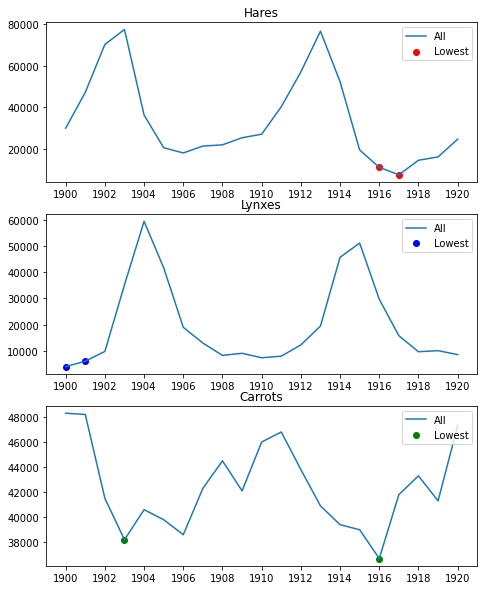

In [5]:
#Find the top 2 years for each species when they had the lowest populations.
y1 = np.argsort(data[:, 1])[:2]
y2 = np.argsort(data[:, 2])[:2]
y3 = np.argsort(data[:, 3])[:2]

plt.figure(figsize=(17,10))
plt.subplot(3, 2, 1)
plt.plot(data[:,0], data[:,1])
plt.scatter(data[y1,0], data[y1,1], c='r')
plt.title('Hares')
plt.xticks(data[:,0].astype(int)[::2])
plt.legend(('All', 'Lowest'), loc='upper right')
plt.subplot(3,2, 3)
plt.plot(data[:,0], data[:,2])
plt.scatter(data[y2,0], data[y2,2], c='b')
plt.title('Lynxes')
plt.xticks(data[:,0].astype(int)[::2])
plt.legend(('All', 'Lowest'), loc='upper right')
plt.subplot(3,2,5)
plt.plot(data[:,0], data[:,3])
plt.scatter(data[y3,0], data[y3,3], c='g')
plt.title('Carrots')
plt.xticks(data[:,0].astype(int)[::2])
plt.legend(('All', 'Lowest'), loc='upper right')
plt.show()

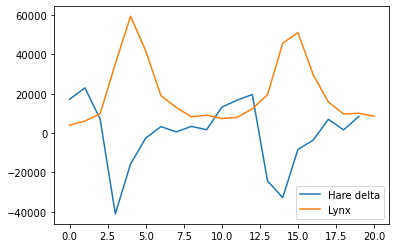

correlation coefficient: 
 [[ 1.         -0.69334852]
 [-0.69334852  1.        ]]


In [7]:
#Plot the change in hare population and the number of lynxes. Find the correlation coefficient.
plt.plot(np.diff(data[:,1]), label = 'Hare delta')
plt.plot(data[:,2], label = 'Lynx')
plt.legend()
plt.show()
print('correlation coefficient: \n', np.corrcoef(np.diff(data[:,1]), data[:-1,2]))

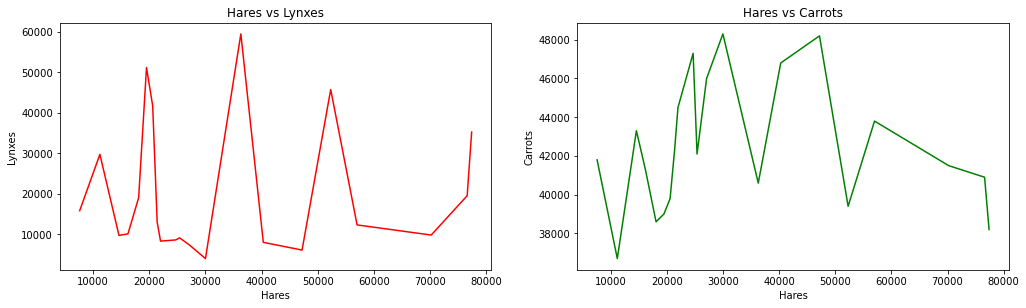

In [6]:
#Show population of hares vs carrots and hares vs lynxes.
hares = np.argsort(data[:, 1])
plt.figure(figsize=(17,10))
plt.subplot(2, 2, 1)
plt.plot(data[hares, 1], data[hares, 2], c='r')
plt.title('Hares vs Lynxes')
plt.xlabel('Hares')
plt.ylabel('Lynxes')
plt.subplot(2, 2, 2)
plt.plot(data[hares, 1], data[hares, 3], c= 'g')
plt.title('Hares vs Carrots')
plt.xlabel('Hares')
plt.ylabel('Carrots')
plt.show()

In [7]:
#Assume the population of hares in 1920 is unknown. 
#Suggest a way to estimate this value. 
#Compare an estimated value with the true value and print a ratio of the error to the true value.
median = np.median(data[:20, 1])
print("Predicted value = {0}".format(median))
error = abs((median / data[20, 1]) - 1)
print("Error = {0:3.5f}".format(error))

Predicted value = 26250.0
Error = 0.06275
